In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")


In [3]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()



iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

In [18]:
# Filter countries of interest
countries = ["Kenya"]
filtered_df = df[df["location"].isin(countries)]
print (filtered_df)

       iso_code continent location        date  total_cases  new_cases  \
157787      KEN    Africa    Kenya  2020-01-03          NaN        0.0   
157788      KEN    Africa    Kenya  2020-01-04          NaN        0.0   
157789      KEN    Africa    Kenya  2020-01-05          NaN        0.0   
157790      KEN    Africa    Kenya  2020-01-06          NaN        0.0   
157791      KEN    Africa    Kenya  2020-01-07          NaN        0.0   
...         ...       ...      ...         ...          ...        ...   
159167      KEN    Africa    Kenya  2023-10-14     343999.0        0.0   
159168      KEN    Africa    Kenya  2023-10-15     343999.0        0.0   
159169      KEN    Africa    Kenya  2023-10-16     343999.0        0.0   
159170      KEN    Africa    Kenya  2023-10-17     343999.0        0.0   
159171      KEN    Africa    Kenya  2023-10-18     343999.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
157787                 NaN        

In [20]:

# Drop rows with missing date or critical columns like new_cases or total_cases
clean_df = filtered_df.dropna(subset=["date", "new_cases", "total_cases"])
print(clean_df)

       iso_code continent location        date  total_cases  new_cases  \
157858      KEN    Africa    Kenya  2020-03-14          1.0        1.0   
157859      KEN    Africa    Kenya  2020-03-15          1.0        0.0   
157860      KEN    Africa    Kenya  2020-03-16          3.0        2.0   
157861      KEN    Africa    Kenya  2020-03-17          3.0        0.0   
157862      KEN    Africa    Kenya  2020-03-18          4.0        1.0   
...         ...       ...      ...         ...          ...        ...   
159167      KEN    Africa    Kenya  2023-10-14     343999.0        0.0   
159168      KEN    Africa    Kenya  2023-10-15     343999.0        0.0   
159169      KEN    Africa    Kenya  2023-10-16     343999.0        0.0   
159170      KEN    Africa    Kenya  2023-10-17     343999.0        0.0   
159171      KEN    Africa    Kenya  2023-10-18     343999.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
157858               0.143        

In [24]:
clean_df = filtered_df.copy()
clean_df["date"] = pd.to_datetime(clean_df["date"])


In [26]:
clean_df["new_cases"] = clean_df["new_cases"].interpolate()
clean_df["total_cases"] = clean_df["total_cases"].interpolate()

In [32]:
clean_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
157787,KEN,Africa,Kenya,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
157788,KEN,Africa,Kenya,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
157789,KEN,Africa,Kenya,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
157790,KEN,Africa,Kenya,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN
157791,KEN,Africa,Kenya,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.4,24.651,1.4,66.7,0.601,54027484.0,NaN,NaN,NaN,NaN


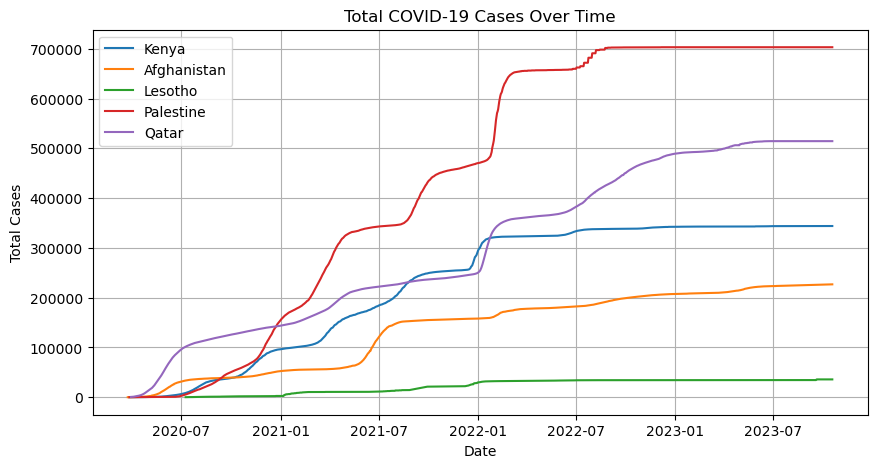

In [38]:
import matplotlib.pyplot as plt
df = pd.read_csv("owid-covid-data.csv")

# Filter countries of interest
countries = ["Kenya", "Afghanistan", "Lesotho","Palestine","Qatar"]
filtered_df = df[df["location"].isin(countries)].copy()

# Drop rows with missing values in important columns
filtered_df = filtered_df.dropna(subset=["date", "new_cases", "total_cases", "total_deaths"])

# Convert date to datetime
filtered_df["date"] = pd.to_datetime(filtered_df["date"])

# Interpolate numeric columns
filtered_df["new_cases"] = filtered_df["new_cases"].interpolate()
filtered_df["total_cases"] = filtered_df["total_cases"].interpolate()
filtered_df["total_deaths"] = filtered_df["total_deaths"].interpolate()

# Calculate death rate
filtered_df["death_rate"] = filtered_df["total_deaths"] / filtered_df["total_cases"]

# Plot total cases over time
plt.figure(figsize=(10, 5))
for country in countries:
    country_data = filtered_df[filtered_df["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

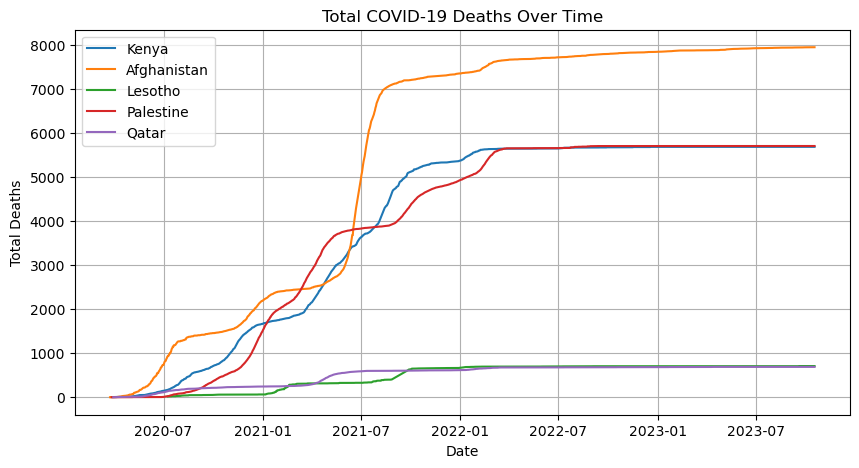

In [42]:
# Plot total deaths over time
plt.figure(figsize=(10, 5))
for country in countries:
    country_data = filtered_df[filtered_df["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.show()

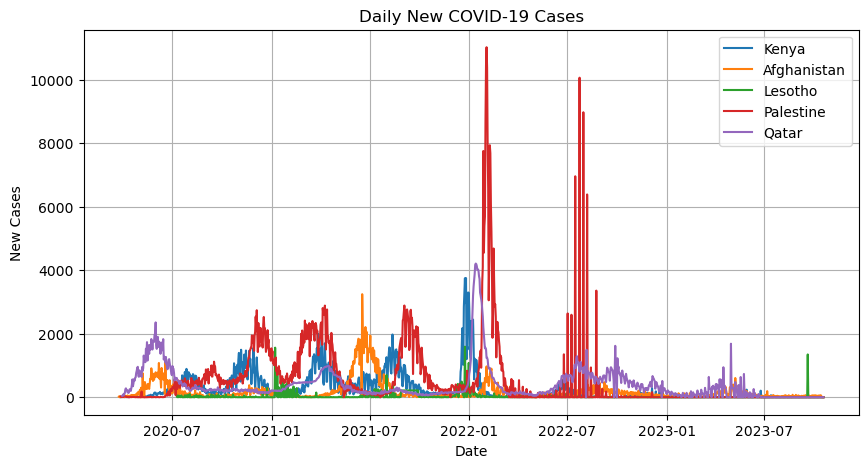

In [44]:
# Compare daily new cases
plt.figure(figsize=(10, 5))
for country in countries:
    country_data = filtered_df[filtered_df["location"] == country]
    plt.plot(country_data["date"], country_data["new_cases"], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
filtered_df[["location", "date", "total_cases", "total_deaths", "death_rate"]].head(15)

,location,date,total_cases,total_deaths,death_rate
81,Afghanistan,2020-03-24,40.0,1.0,0.025000
82,Afghanistan,2020-03-25,42.0,1.0,0.023810
83,Afghanistan,2020-03-26,74.0,1.0,0.013514
84,Afghanistan,2020-03-27,74.0,1.0,0.013514
85,Afghanistan,2020-03-28,80.0,2.0,0.025000
86,Afghanistan,2020-03-29,91.0,2.0,0.021978
87,Afghanistan,2020-03-30,106.0,3.0,0.028302
88,Afghanistan,2020-03-31,114.0,4.0,0.035088
89,Afghanistan,2020-04-01,166.0,4.0,0.024096
90,Afghanistan,2020-04-02,192.0,4.0,0.020833


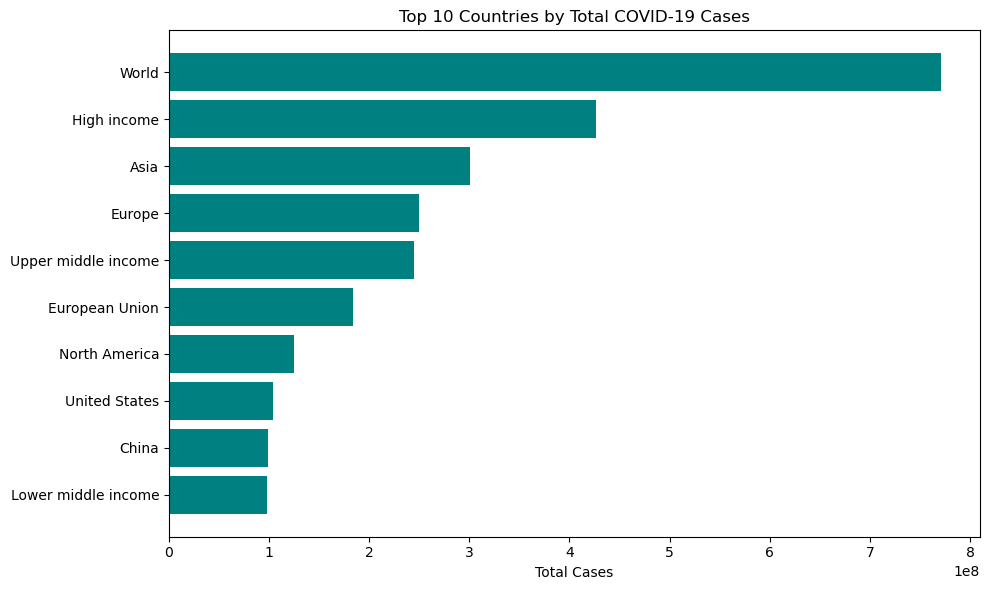

In [57]:
# Get the latest date per country and total cases
latest_cases = df.dropna(subset=["total_cases"]).copy()
latest_cases["date"] = pd.to_datetime(latest_cases["date"])
latest_cases = latest_cases.sort_values("date").groupby("location").last().sort_values("total_cases", ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(latest_cases.index[::-1], latest_cases["total_cases"][::-1], color="teal")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.tight_layout()
plt.show()

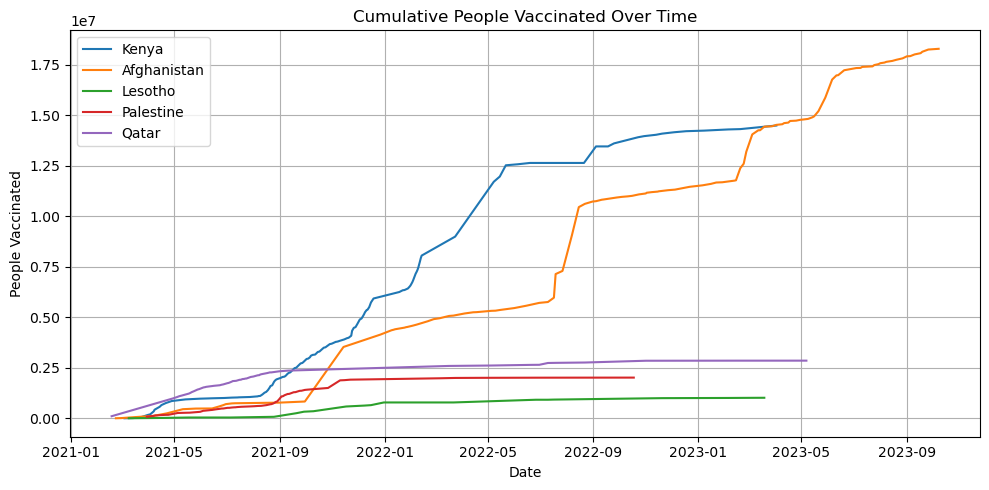

In [61]:
plt.figure(figsize=(10, 5))
for country in countries:
    country_data = df[df["location"] == country]
    country_data = country_data.dropna(subset=["date", "people_vaccinated"])
    country_data["date"] = pd.to_datetime(country_data["date"])
    plt.plot(country_data["date"], country_data["people_vaccinated"], label=country)

plt.title("Cumulative People Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

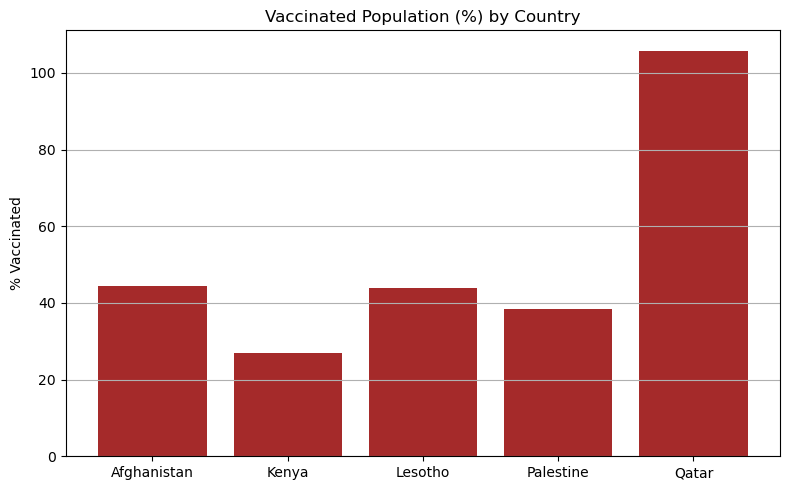

In [79]:
latest_vax = df[df["location"].isin(countries)].copy()
latest_vax["date"] = pd.to_datetime(latest_vax["date"])
latest_vax = latest_vax.sort_values("date").groupby("location").last()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(latest_vax.index, latest_vax["people_vaccinated_per_hundred"], color="brown")
plt.title("Vaccinated Population (%) by Country")
plt.ylabel("% Vaccinated")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

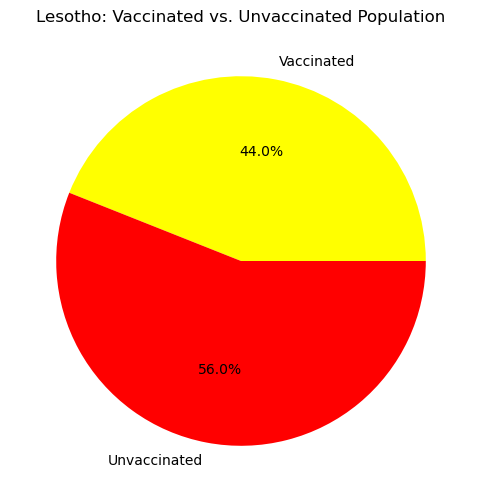

In [85]:
kenya = latest_vax.loc["Lesotho"]
vaccinated = kenya["people_vaccinated_per_hundred"]
unvaccinated = 100 - vaccinated

plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated], labels=["Vaccinated", "Unvaccinated"], autopct='%1.1f%%', colors=["yellow", "red"])
plt.title("Lesotho: Vaccinated vs. Unvaccinated Population")
plt.show()

In [ ]:

 Insights & Reporting
Qatar git the highest vaccinated population among the five countries
Palestine had the highest number of reported covid 19 cases and deaths
Afghanistan and Lesotho had lower reported case numbers, which may reflect limited testing and underreporting 
Palestine had a late covid 19 spike in 2022
Kenya had a low vaccine intake with only 24% of the population vaccinated